<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import normalize
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
# mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
# mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

(X_train, y_train),(X_valid, y_valid) = mnist.load_data()

X_train_r = X_train.copy()
y_train_r = y_train.copy()


X_train_r = normalize(X_train_r)
y_train_r = normalize(y_train_r)

X_valid = normalize(X_valid)
y_valid = normalize(y_valid)

# X_train_r = np.asarray(X_train_r)
# y_train_r = np.asarray(y_train_r)

# X_valid = np.asarray(X_valid).astype('float32')
# y_valid = np.asarray(y_valid).astype('float32')

In [0]:
# X_train_r = X_train_r.reshape((60000, 28 * 28))
# X_train_r = X_train_r.astype('float32')/255

# y_train_r = y_train_r.reshape((10000, 28 * 28))
# y_train_r = y_train_r.astype('float32')/255


# scaler = StandardScaler().fit(X_train_r)
# X_train_s = scaler.fit_transform(X_train_r)

# scaler2 = StandardScaler().fit(y_train_r)
# y_train_s = scaler2.fit_transform(y_train_r)


In [0]:
X_train_r.shape

(60000, 28, 28)

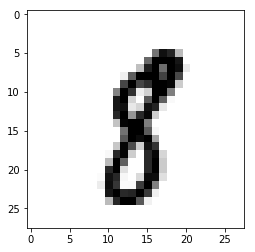

In [0]:
plt.imshow(X_train[300], cmap = plt.cm.binary)
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = 'relu', input_shape = (28 * 28, )))
# model.add(layers.Dense(8, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop' ,
             loss = 'categorical_crossentropy',
             matrics = ['accuracy'])

history = model.fit(X_train_r, y_train_r.T, 
                   epochs = 10, 
                   batch_size = 100,
                   validation_data=(X_valid, y_valid.T))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1355 - val_loss: 0.3972
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1630 - val_loss: 0.3999
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1578 - val_loss: 0.3837
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1508 - val_loss: 0.3716
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1438 - val_loss: 0.3447
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1360 - val_loss: 0.3197
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1273 - val_loss: 0.3170
Epoch 8/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1182 - val_loss: 0.2829
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1050 - val_

In [0]:
history_keys = history.history
history_keys.keys()

dict_keys(['loss', 'val_loss'])

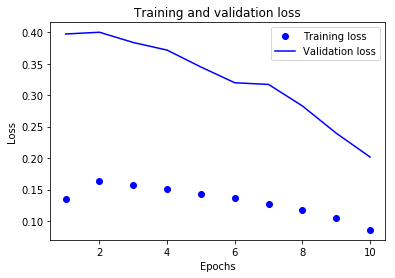

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 10 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
scores.history

{'loss': [0.10740356841087341, 0.11607370029687882]}

In [0]:
y_valid = y_valid.T
y_valid.shape

(10000, 1)

In [0]:
loss = model.evaluate(X_valid, y_valid)

print( loss)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2018
0.20179340181350708
